<a href="https://colab.research.google.com/github/Kobeieii/Project/blob/main/HR_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#library for regular expression
import re


#library for exporting model
import pickle

In [ ]:
# ปรับ style พื้นหลังของ Graph
sns.set_style('darkgrid')
# โค้ดส่วนนี้เพื่อ download font ที่แสดงภาษาไทยใน Graph
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

## 1.Data collection

In [ ]:
#ฐานข้อมูลเป็นความลับไม่สามารถเปิดเผยได้

In [ ]:
#df_resign.columns

In [ ]:
list_col = ['ID', 'Created By', 'Status', 'Lookup','Division', 'Department', 'Company',
       'Gender', 'Age', 'Year of Service', 'Education', 'Job Level',
       'Job Type', 'q01-Engagement (Stay)', 'q02-Engagement (Say)',
       'q03-Engagement (Strive)', 'q04-Engagement (Stay)',
       'q05-Engagement (Say)', 'q06-Engagement (Strive)',
       'q07-Empowerment/Autonomy', 'q08-Rewards & Recognition', 'q09-Brand',
       'q10-Career Opportunities', 'q11-Diversity & Inclusion',
       'q12-Enabling Infrastructure', 'q13-Learning & Development',
       'q14-Supervision', 'q15-Performance Management', 'q16-Brand',
       'q17-Rewards & Recognition', 'q18-Rewards & Recognition',
       'q19-Enabling Infrastructure', 'q20-Work Tasks',
       'q21-Enabling Infrastructure', 'q22-Work Tasks',
       'q23-Work/Life Balance', 'q24-Career Opportunities',
       'q25-Learning & Development', 'q26-Collaboration',
       'q27-Diversity & Inclusion', 'q28-Learning & Development',
       'q29-Supervision', 'q30-Performance Management',
       'q31-Rewards & Recognition', 'q32-Rewards & Recognition',
       'q33-Talent & Staffing', 'q34-Senior Leadership',
       'q35-Senior Leadership', 'q36-Senior Leadership', 'q37-Work Tasks',
       'q38-Career Opportunities', 'q39-Collaboration', 'q40-Collaboration',
       'q41-Supervision', 'q42-Supervision', 'q43-Supervision',
       'q44-Supervision', 'q45-Brand', 'q46-Brand',
       'q47-Enabling Infrastructure', 'q48-Senior Leadership',
       'q49-Senior Leadership', 'q50-Senior Leadership',
       'q51-Empowerment/Autonomy', 'q52-Empowerment/Autonomy',
       'q53-Work/Life Balance', 'q54-Talent & Staffing',
       'q55-Talent & Staffing', 'q56-Talent & Staffing',
       'q57-Enabling Infrastructure', 'q58-Brand', 'q59-Brand',
       'q60-Performance Management', 'q61-Health and Well-Being',
       'q62-Trust in Action', 'q63-Trust in Action', 'q64-Trust in Action',
       'q65-Trust in Action', 'q66-MBK additional question',
       'q67-MBK additional question', 'q68-MBK additional question',
       'q69-MBK additional question', 'q70-MBK additional question',
       'q72-Open-Ended', 'q73-Open-Ended', 'q73-1-Open-Ended',
       'q74-Open-Ended', 'q74-1-Open-Ended', 'q75-Open-Ended','NA']

list_sort = ['Created By', 'Status', 'Gender', 'Department', 'Age', 'Year of Service',
       'q09-Brand','q16-Brand','q45-Brand','q46-Brand','q58-Brand','q59-Brand',
       'q10-Career Opportunities','q24-Career Opportunities','q38-Career Opportunities',
       'q26-Collaboration','q39-Collaboration','q40-Collaboration',
       'q11-Diversity & Inclusion','q27-Diversity & Inclusion',
       'q07-Empowerment/Autonomy','q51-Empowerment/Autonomy','q52-Empowerment/Autonomy',
       'q12-Enabling Infrastructure','q19-Enabling Infrastructure','q21-Enabling Infrastructure','q47-Enabling Infrastructure','q57-Enabling Infrastructure',
       'q02-Engagement (Say)','q05-Engagement (Say)','q01-Engagement (Stay)','q04-Engagement (Stay)','q03-Engagement (Strive)','q06-Engagement (Strive)',
       'q61-Health and Well-Being',
       'q13-Learning & Development','q25-Learning & Development','q28-Learning & Development',
       'q15-Performance Management','q30-Performance Management','q60-Performance Management',
       'q08-Rewards & Recognition','q17-Rewards & Recognition','q18-Rewards & Recognition','q31-Rewards & Recognition','q32-Rewards & Recognition',
       'q34-Senior Leadership','q35-Senior Leadership','q36-Senior Leadership','q48-Senior Leadership','q49-Senior Leadership','q50-Senior Leadership',
       'q14-Supervision','q29-Supervision','q41-Supervision','q42-Supervision','q43-Supervision','q44-Supervision',
       'q33-Talent & Staffing','q54-Talent & Staffing','q55-Talent & Staffing','q56-Talent & Staffing',
       'q62-Trust in Action','q63-Trust in Action','q64-Trust in Action','q65-Trust in Action',
       'q20-Work Tasks','q22-Work Tasks','q37-Work Tasks',
       'q23-Work/Life Balance','q53-Work/Life Balance'
       ]
df_resign.columns = list_col

In [ ]:
df_resign_select = df_resign[list_sort]
df_resign_select['Created By'] = df_resign_select['Created By'].str.lower()
df_resign_select.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Created By,Status,Gender,Department,Age,Year of Service,q09-Brand,q16-Brand,q45-Brand,q46-Brand,q58-Brand,q59-Brand,q10-Career Opportunities,q24-Career Opportunities,q38-Career Opportunities,q26-Collaboration,q39-Collaboration,q40-Collaboration,q11-Diversity & Inclusion,q27-Diversity & Inclusion,q07-Empowerment/Autonomy,q51-Empowerment/Autonomy,q52-Empowerment/Autonomy,q12-Enabling Infrastructure,q19-Enabling Infrastructure,q21-Enabling Infrastructure,q47-Enabling Infrastructure,q57-Enabling Infrastructure,q02-Engagement (Say),q05-Engagement (Say),q01-Engagement (Stay),q04-Engagement (Stay),q03-Engagement (Strive),q06-Engagement (Strive),q61-Health and Well-Being,q13-Learning & Development,q25-Learning & Development,q28-Learning & Development,q15-Performance Management,q30-Performance Management,q60-Performance Management,q08-Rewards & Recognition,q17-Rewards & Recognition,q18-Rewards & Recognition,q31-Rewards & Recognition,q32-Rewards & Recognition,q34-Senior Leadership,q35-Senior Leadership,q36-Senior Leadership,q48-Senior Leadership,q49-Senior Leadership,q50-Senior Leadership,q14-Supervision,q29-Supervision,q41-Supervision,q42-Supervision,q43-Supervision,q44-Supervision,q33-Talent & Staffing,q54-Talent & Staffing,q55-Talent & Staffing,q56-Talent & Staffing,q62-Trust in Action,q63-Trust in Action,q64-Trust in Action,q65-Trust in Action,q20-Work Tasks,q22-Work Tasks,q37-Work Tasks,q23-Work/Life Balance,q53-Work/Life Balance
0,thatsorn kongsook,NaN,(2) หญิง,สำนักกรรมการผู้อำนวยการ,(6) มากกว่า 45 ปี,(6) มากกว่า 10 ปี,4,6,4,4,5,4,4,2,6,4,6,4,4,4,4,4,4,4,6,4,6,4,4,6,6,6,4,4,4,4,4,4,6,6,4,6,4,4,4,4,4,4,4,6,6,6,6,6,4,4,4,4,6,6,4,4,4,4,5,4,6,4,4,4,4
1,ratthanon sajjapirat,NaN,(2) หญิง,ฝ่ายตรวจสอบการปฏิบัติการ,(6) มากกว่า 45 ปี,(6) มากกว่า 10 ปี,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,4,4,3,4,3,2,2,4,3,4,4,4,4,4,4,4,5,4,4,4,4,4,4,5,4,4,4,4,4,4,4,4,4,4,5,5,4,4,5,6,4,5,4,4,5
2,thongphan bunjong,NaN,(1) ชาย,ฝ่ายบริหารความปลอดภัย,(6) มากกว่า 45 ปี,(6) มากกว่า 10 ปี,4,6,6,6,4,6,6,4,6,6,4,6,6,6,4,4,6,6,6,4,6,6,6,6,6,4,6,6,6,6,6,4,4,6,6,2,4,6,4,3,6,6,6,6,6,6,6,4,4,4,6,4,6,6,6,6,4,6,4,4,6,6,6,4,4
3,somkiet shiewkratok,NaN,(1) ชาย,ฝ่ายวิศวกรรม,(6) มากกว่า 45 ปี,(6) มากกว่า 10 ปี,4,2,4,6,6,6,6,6,6,6,6,6,6,6,6,6,4,6,6,6,6,6,6,6,6,6,6,3,6,6,6,4,6,6,6,6,4,4,4,6,6,5,4,4,6,6,4,6,4,6,4,4,4,6,4,5,6,4,4,4,6,4,4,6,4
4,sarhai narkniyom,NaN,(2) หญิง,ฝ่ายบริการ,(6) มากกว่า 45 ปี,(6) มากกว่า 10 ปี,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6


In [ ]:
#j
df_map_name[df_map_name['EE 59']==df_map_name['EE 59'][56]]['ps (27)'].values[0].strip(' ').lower()

'tanan saelaing'

In [ ]:
#i
df_map_name['EE 59'][56].strip(' ').lower()

'tanan sae laing'

In [ ]:
for i in df_map_name['EE 59']:
  ##print("i=",i)
  j=df_map_name[df_map_name['EE 59']==i]['ps (27)'].values[0].strip(' ').lower()
  i=i.strip(' ').lower()
  df_resign_select['Created By'].replace([i], [j],inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
df_information = df_information.rename(columns={'Unnamed: 4':'Surname','Unnamed: 5':'Full_Name'})
df_information_select = df_information[['Full_Name','Sex','Grade','Service Years','Service Months','Service Days']]
df_information_select['Full_Name'] = df_information_select['Full_Name'].str.lower()
df_information_select['Service Total Days'] = df_information_select['Service Years'].fillna(0)*365 + df_information_select['Service Months'].fillna(0)*30 + df_information_select.fillna(0)['Service Days']
df_information_select.drop(['Service Years','Service Months','Service Days'], axis=1, inplace=True)
df_information_select.head()
#df_information.info()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats 

,Full_Name,Sex,Grade,Service Total Days
0,kaesinee kongsupamanon,หญิง,14.0,8331.0
1,boonlert rakwijitsil,ชาย,15.0,8211.0
2,pornpen poungmechai,หญิง,14.0,8211.0
3,rewat wongkaroon,ชาย,14.0,8059.0
4,lumjune promsri,ชาย,10.0,7012.0


In [ ]:
df_resign_select['Created By'] = df_resign_select['Created By'].str.lower()
df_information_select['Full_Name'] = df_information_select['Full_Name'].str.lower()
df = df_resign_select.merge(df_information_select, how='left', left_on='Created By', right_on='Full_Name')

,Created By,Status,Gender,Department,Age,Year of Service,q09-Brand,q16-Brand,q45-Brand,q46-Brand,q58-Brand,q59-Brand,q10-Career Opportunities,q24-Career Opportunities,q38-Career Opportunities,q26-Collaboration,q39-Collaboration,q40-Collaboration,q11-Diversity & Inclusion,q27-Diversity & Inclusion,q07-Empowerment/Autonomy,q51-Empowerment/Autonomy,q52-Empowerment/Autonomy,q12-Enabling Infrastructure,q19-Enabling Infrastructure,q21-Enabling Infrastructure,q47-Enabling Infrastructure,q57-Enabling Infrastructure,q02-Engagement (Say),q05-Engagement (Say),q01-Engagement (Stay),q04-Engagement (Stay),q03-Engagement (Strive),q06-Engagement (Strive),q61-Health and Well-Being,q13-Learning & Development,q25-Learning & Development,q28-Learning & Development,q15-Performance Management,q30-Performance Management,q60-Performance Management,q08-Rewards & Recognition,q17-Rewards & Recognition,q18-Rewards & Recognition,q31-Rewards & Recognition,q32-Rewards & Recognition,q34-Senior Leadership,q35-Senior Leadership,q36-Senior Leadership,q48-Senior Leadership,q49-Senior Leadership,q50-Senior Leadership,q14-Supervision,q29-Supervision,q41-Supervision,q42-Supervision,q43-Supervision,q44-Supervision,q33-Talent & Staffing,q54-Talent & Staffing,q55-Talent & Staffing,q56-Talent & Staffing,q62-Trust in Action,q63-Trust in Action,q64-Trust in Action,q65-Trust in Action,q20-Work Tasks,q22-Work Tasks,q37-Work Tasks,q23-Work/Life Balance,q53-Work/Life Balance,Full_Name,Sex,Grade,Service Total Days
0,thatsorn kongsook,NaN,(2) หญิง,สำนักกรรมการผู้อำนวยการ,(6) มากกว่า 45 ปี,(6) มากกว่า 10 ปี,4,6,4,4,5,4,4,2,6,4,6,4,4,4,4,4,4,4,6,4,6,4,4,6,6,6,4,4,4,4,4,4,6,6,4,6,4,4,4,4,4,4,4,6,6,6,6,6,4,4,4,4,6,6,4,4,4,4,5,4,6,4,4,4,4,thatsorn kongsook,หญิง,11.0,10916.0
1,ratthanon sajjapirat,NaN,(2) หญิง,ฝ่ายตรวจสอบการปฏิบัติการ,(6) มากกว่า 45 ปี,(6) มากกว่า 10 ปี,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,4,4,3,4,3,2,2,4,3,4,4,4,4,4,4,4,5,4,4,4,4,4,4,5,4,4,4,4,4,4,4,4,4,4,5,5,4,4,5,6,4,5,4,4,5,ratthanon sajjapirat,หญิง,14.0,9389.0
2,thongphan bunjong,NaN,(1) ชาย,ฝ่ายบริหารความปลอดภัย,(6) มากกว่า 45 ปี,(6) มากกว่า 10 ปี,4,6,6,6,4,6,6,4,6,6,4,6,6,6,4,4,6,6,6,4,6,6,6,6,6,4,6,6,6,6,6,4,4,6,6,2,4,6,4,3,6,6,6,6,6,6,6,4,4,4,6,4,6,6,6,6,4,6,4,4,6,6,6,4,4,thongphan bunjong,ชาย,8.0,9381.0
3,somkiet shiewkratok,NaN,(1) ชาย,ฝ่ายวิศวกรรม,(6) มากกว่า 45 ปี,(6) มากกว่า 10 ปี,4,2,4,6,6,6,6,6,6,6,6,6,6,6,6,6,4,6,6,6,6,6,6,6,6,6,6,3,6,6,6,4,6,6,6,6,4,4,4,6,6,5,4,4,6,6,4,6,4,6,4,4,4,6,4,5,6,4,4,4,6,4,4,6,4,somkiet shiewkratok,ชาย,10.0,9285.0
4,sarhai narkniyom,NaN,(2) หญิง,ฝ่ายบริการ,(6) มากกว่า 45 ปี,(6) มากกว่า 10 ปี,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,sarhai narkniyom,หญิง,10.0,11578.0


## 2.Data cleaning and Extract Features

### 2.1 Data Cleansing
- จัดการ ค่าข้อมูลที่ผิดเพี้ยนไป เช่นค่าหายไป ค่าโดดเกินผิดปกติ

เช็ค Column qeustion ต่างๆเพื่อดูว่ามี ค่าว่าง (Null) ที่ต้องจัดการก่อนคิด scoreไหม

In [ ]:
df_clean = df.copy()

In [ ]:
q_col = [q for q in df.columns if q.startswith('q')]
check = df_clean[q_col].isna().sum().reset_index().rename(columns={0:'Num of null'})
check[check['Num of null']>0]

,index,Num of null


ทำ Score ในแต่ละหมวดผ่านการ คำนวณ average และจัดลำดับคะแนน

In [ ]:
list_q = [['q09-Brand','q16-Brand','q45-Brand','q46-Brand','q58-Brand','q59-Brand'],
       ['q10-Career Opportunities','q24-Career Opportunities','q38-Career Opportunities'],
       ['q26-Collaboration','q39-Collaboration','q40-Collaboration'],
       ['q11-Diversity & Inclusion','q27-Diversity & Inclusion'],
       ['q07-Empowerment/Autonomy','q51-Empowerment/Autonomy','q52-Empowerment/Autonomy'],
       ['q12-Enabling Infrastructure','q19-Enabling Infrastructure','q21-Enabling Infrastructure','q47-Enabling Infrastructure','q57-Enabling Infrastructure'],
       ['q02-Engagement (Say)','q05-Engagement (Say)','q01-Engagement (Stay)','q04-Engagement (Stay)','q03-Engagement (Strive)','q06-Engagement (Strive)'],
       ['q61-Health and Well-Being'],
       ['q13-Learning & Development','q25-Learning & Development','q28-Learning & Development'],
       ['q15-Performance Management','q30-Performance Management','q60-Performance Management'],
       ['q08-Rewards & Recognition','q17-Rewards & Recognition','q18-Rewards & Recognition','q31-Rewards & Recognition','q32-Rewards & Recognition'],
       ['q34-Senior Leadership','q35-Senior Leadership','q36-Senior Leadership','q48-Senior Leadership','q49-Senior Leadership','q50-Senior Leadership'],
       ['q14-Supervision','q29-Supervision','q41-Supervision','q42-Supervision','q43-Supervision','q44-Supervision'],
       ['q33-Talent & Staffing','q54-Talent & Staffing','q55-Talent & Staffing','q56-Talent & Staffing'],
       ['q62-Trust in Action','q63-Trust in Action','q64-Trust in Action','q65-Trust in Action'],
       ['q20-Work Tasks','q22-Work Tasks','q37-Work Tasks'],
       ['q23-Work/Life Balance','q53-Work/Life Balance']
       ]
name_q = ['Brand',
       'Career Opportunities',
       'Collaboration',
       'Diversity & Inclusion',
       'Empowerment/Autonomy',
       'Enabling Infrastructure',
       'Engagement (Strive)',
       'Health and Well-Being',
       'Learning & Development',
       'Performance Management',
       'Rewards & Recognition',
       'Senior Leadership',
       'Supervision',
       'Talent & Staffing',
       'Trust in Action',
       'Work Tasks',
       'Work/Life Balance'
]

In [ ]:
df_clean_q = df_clean.copy()
for i, col in enumerate(list_q):
    col_name = f'Score_{name_q[i]}'
    #print(col_name, col)
    df_clean_q[col_name] = df_clean_q[col].mean(axis=1)
    #print(df_clean_q.shape, df_clean_q[col].shape, df_clean_q[col].mean(axis=1).shape)
    conditions = [(df_clean_q[col_name]<3.5),
              (df_clean_q[col_name]>=3.5) & (df_clean_q[col_name]<4.5),
              (df_clean_q[col_name]>=4.5) & (df_clean_q[col_name]<5.5),
              (df_clean_q[col_name]>=5.5)
             ]
    choices = [1,2,3,4]
    df_clean_q[col_name] = np.select(conditions, choices, default=0)

#clean    
df_clean_q["Status"].fillna("Existing",inplace = True)
df_clean_q["Gender"] = df_clean_q["Gender"].map({'(1) ชาย':'ชาย', '(2) หญิง':'หญิง'})
df_clean_q['Age'] = df_clean_q['Age'].map({'(1)  20 – 25 ปี':'20 – 25', '(2)  26 - 30 ปี':'26 - 30', '(3)  31 – 35 ปี':'31 – 35',
                                           '(4)  36 – 40 ปี':'36 – 40', '(5)  41 – 45 ปี':'41 – 45', '(6)  มากกว่า 45 ปี':'>45'})
# Drop แถวที่ไม่มีค่า จาก df_information_select
df_clean_q = df_clean_q.dropna()

In [ ]:
list_for_train = ['Status','Gender','Department','Age'
,'Grade','Service Total Days'
,'Score_Brand','Score_Career Opportunities','Score_Collaboration','Score_Diversity & Inclusion'
,'Score_Empowerment/Autonomy','Score_Enabling Infrastructure','Score_Engagement (Strive)'
,'Score_Health and Well-Being','Score_Learning & Development','Score_Performance Management'
,'Score_Rewards & Recognition','Score_Senior Leadership','Score_Supervision'
,'Score_Talent & Staffing','Score_Trust in Action','Score_Work Tasks','Score_Work/Life Balance']

df_clean_final = df_clean_q[list_for_train]
df_clean_final

,Status,Gender,Department,Age,Grade,Service Total Days,Score_Brand,Score_Career Opportunities,Score_Collaboration,Score_Diversity & Inclusion,Score_Empowerment/Autonomy,Score_Enabling Infrastructure,Score_Engagement (Strive),Score_Health and Well-Being,Score_Learning & Development,Score_Performance Management,Score_Rewards & Recognition,Score_Senior Leadership,Score_Supervision,Score_Talent & Staffing,Score_Trust in Action,Score_Work Tasks,Score_Work/Life Balance
0,Existing,หญิง,สำนักกรรมการผู้อำนวยการ,>45,11.0,10916.0,3,2,3,2,2,3,3,2,2,3,2,3,3,3,2,3,2
1,Existing,หญิง,ฝ่ายตรวจสอบการปฏิบัติการ,>45,14.0,9389.0,2,2,2,2,2,2,1,1,2,2,2,2,2,3,3,2,3
2,Existing,ชาย,ฝ่ายบริหารความปลอดภัย,>45,8.0,9381.0,3,3,3,4,3,4,4,4,3,3,2,4,3,4,3,4,2
3,Existing,ชาย,ฝ่ายวิศวกรรม,>45,10.0,9285.0,3,4,4,4,3,4,4,4,3,4,3,3,3,3,3,3,3
4,Existing,หญิง,ฝ่ายบริการ,>45,10.0,11578.0,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,Existing,หญิง,ฝ่ายการเงิน,20 – 25,7.0,545.0,3,3,3,3,3,3,2,2,3,3,3,3,3,3,3,3,3
380,Existing,หญิง,ฝ่ายบริหารความปลอดภัย,36 – 40,12.0,1012.0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
381,Existing,หญิง,ฝ่ายการตลาด,41 – 45,14.0,1514.0,2,2,2,3,3,3,3,1,3,3,3,2,1,2,2,2,2
382,Existing,ชาย,สำนักกรรมการผู้อำนวยการ,>45,18.0,4775.0,3,4,2,2,3,4,3,4,4,4,4,2,4,3,3,4,4


###Data Analysis



เทียบคะแนนของคนที่ลาออกกับไม่ลาออก

In [ ]:
df_score_exist = df_clean_final.copy()
df_score_exist = df_score_exist.drop(['Gender','Department','Age','Grade','Service Total Days'], axis=1)
df_score_exist = df_score_exist.groupby(['Status']).sum().reset_index()
df_score_exist['count'] = df_score_exist['Status'].map(df_clean_final['Status'].value_counts())
for col in df_score_exist.columns[1:-1] :
    df_score_exist[col] = (df_score_exist[col]/df_score_exist['count'])
df_score_exist["sum"] = df_score_exist[df_score_exist.columns[1:-1]].sum(axis=1)

df_score_exist

,Status,Score_Brand,Score_Career Opportunities,Score_Collaboration,Score_Diversity & Inclusion,Score_Empowerment/Autonomy,Score_Enabling Infrastructure,Score_Engagement (Strive),Score_Health and Well-Being,Score_Learning & Development,Score_Performance Management,Score_Rewards & Recognition,Score_Senior Leadership,Score_Supervision,Score_Talent & Staffing,Score_Trust in Action,Score_Work Tasks,Score_Work/Life Balance,count,sum
0,Existing,2.711921,2.523179,2.619205,2.678808,2.552980,2.586093,2.596026,2.639073,2.639073,2.612583,2.506623,2.678808,2.748344,2.589404,2.728477,2.639073,2.639073,302,44.688742
1,Resign,2.649123,2.315789,2.526316,2.561404,2.508772,2.543860,2.491228,2.561404,2.491228,2.456140,2.456140,2.491228,2.666667,2.614035,2.561404,2.421053,2.438596,57,42.754386


เทียบจำนวนคนที่ลาออก/ไม่ลาออกของแต่ละผแนก

In [ ]:
df_clean_final[(df_clean_final['Status']=='Resign')][['Department','Gender','Status']].groupby(['Department','Gender']).count()

Status
Department                  Gender        
ฝ่ายการตลาด                 ชาย          1
ฝ่ายการเงิน                 หญิง         3
ฝ่ายขาย                     หญิง         5
ฝ่ายคดีและงานนิติบุคคล      หญิง         1
ฝ่ายควบคุมโครงการ           ชาย          2
ฝ่ายจัดซื้อและธุรการ        หญิง         1
ฝ่ายตกแต่ง                  ชาย          1
ฝ่ายตรวจสอบการปฏิบัติการ    ชาย          3
                            หญิง         1
ฝ่ายนิติกรรม-สัญญา          ชาย          1
                            หญิง         1
ฝ่ายบริการ                  ชาย          1
                            หญิง         4
ฝ่ายบริหารกลยุทธ์และระบบงาน หญิง         1
ฝ่ายบริหารความปลอดภัย       ชาย          1
                            หญิง         1
ฝ่ายบัญชีและงบประมาณ        หญิง         5
ฝ่ายวิศวกรรม                ชาย         20
                            หญิง         1
ฝ่ายสื่อสารองค์กร           หญิง         1
ฝ่ายเทคโนโลยีสารสนเทศ       ชาย          1
                            หญิง         1

Text(0.5, 1.0, 'จำนวนคนที่ลาออกแต่ละแผนกแบ่งตามเพศ')

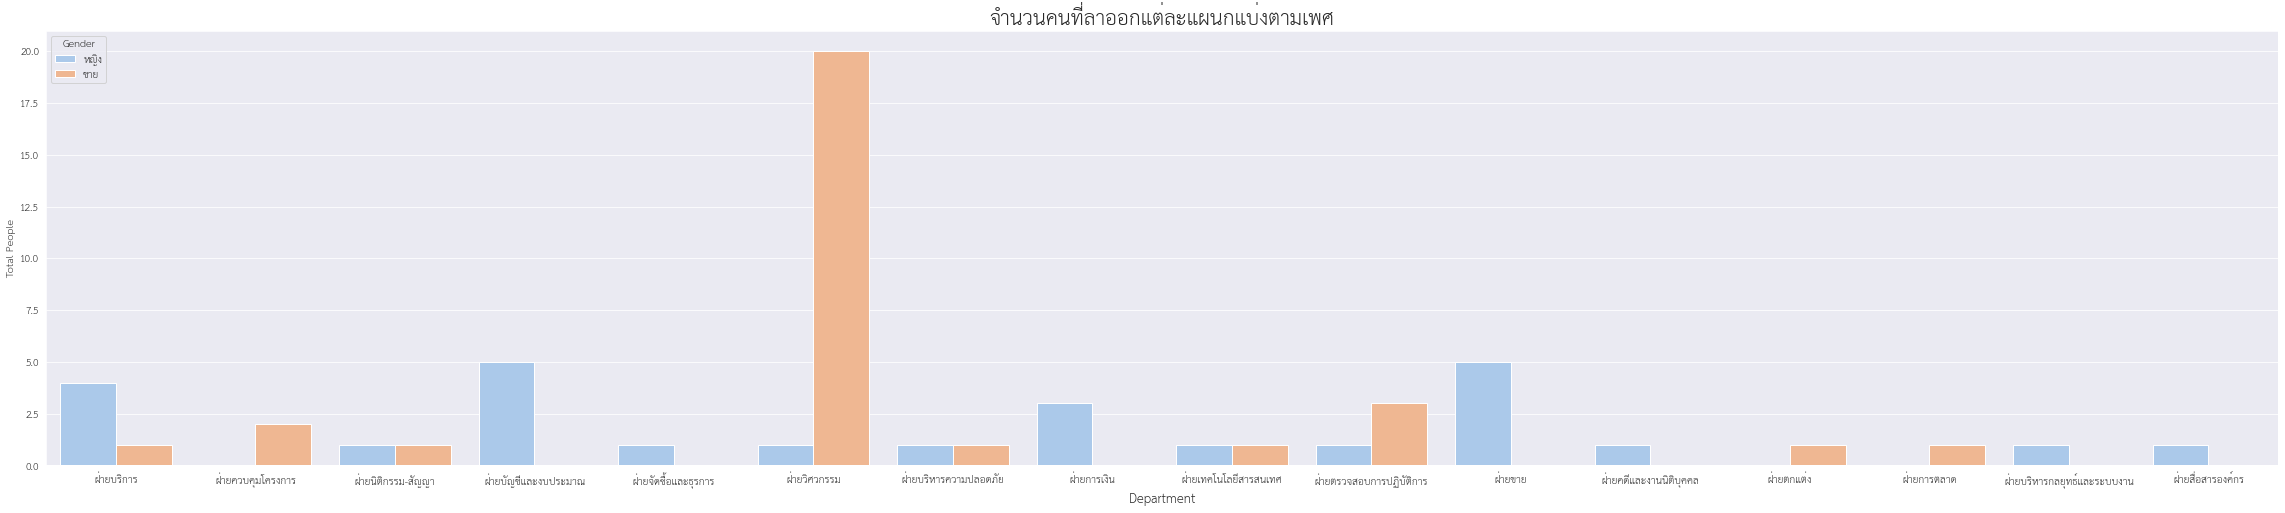

In [ ]:
plt.figure(figsize=(40,8))
sns.countplot(x='Department',data=df_clean_final[df_clean_final['Status']=='Resign'],hue='Gender',palette= 'pastel')
plt.xlabel('Department',fontsize=12)
plt.ylabel('Total People')
plt.title('จำนวนคนที่ลาออกแต่ละแผนกแบ่งตามเพศ',fontsize=20)

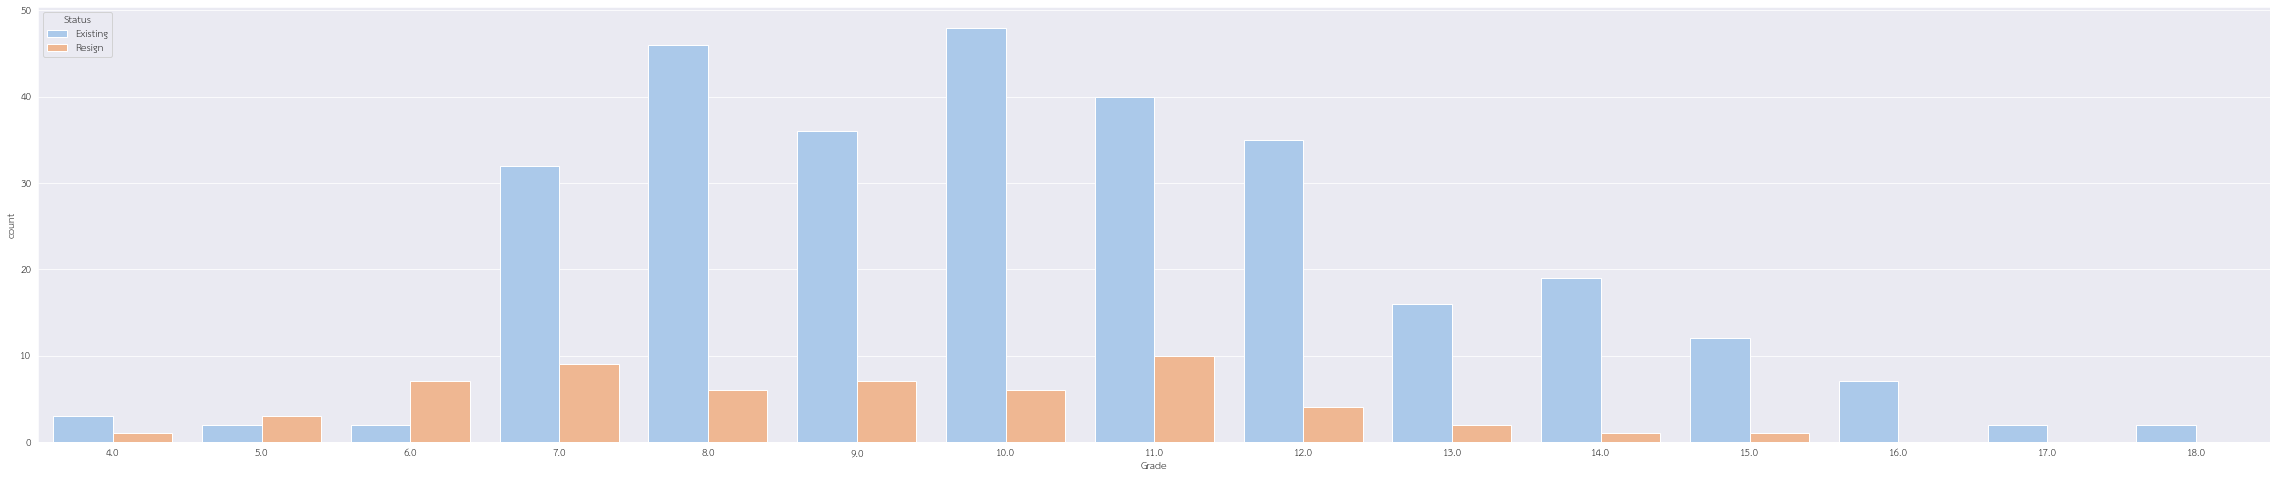

In [ ]:
plt.figure(figsize=(40,8))
sns.countplot(x='Grade',data=df_clean_final,hue='Status',palette= 'pastel')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 7.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


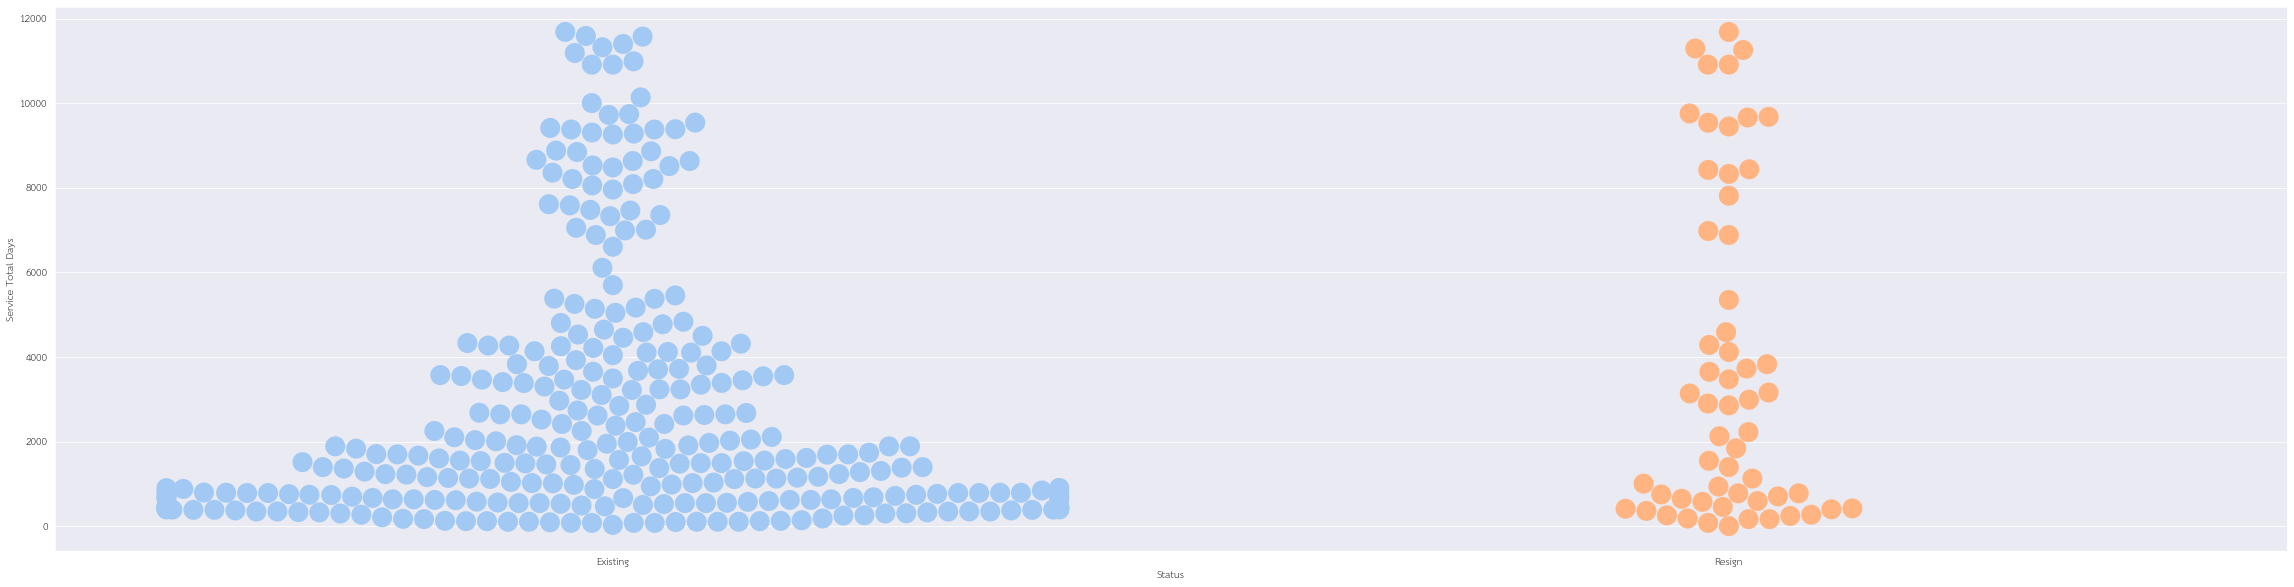

In [ ]:
plt.figure(figsize=(40,10))
sns.swarmplot(x='Status',y='Service Total Days',data=df_clean_final,palette= 'pastel',s=20)


Text(0.5, 0, 'Department')

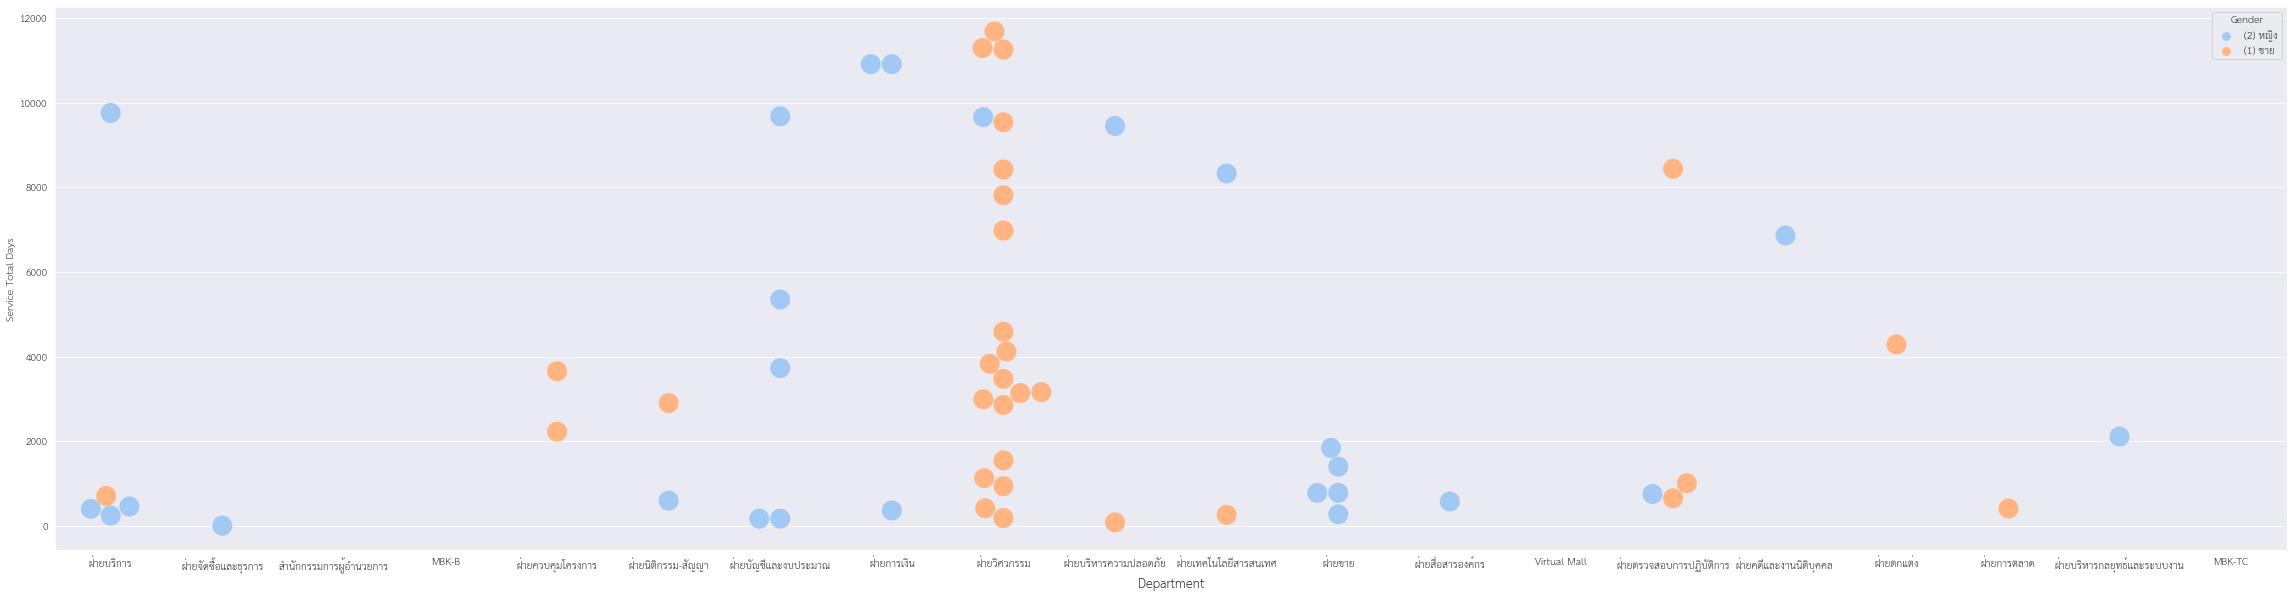

In [ ]:
plt.figure(figsize=(40,10))
sns.swarmplot(x='Department',y='Service Total Days',data=df_clean[df_clean['Status']=='Resign'],hue='Gender',palette= 'pastel',s=20)
plt.xlabel('Department',fontsize=12)

### 2.2 Extract Features
- การจัดการข้อมูลให้พร้อม สำหรับการ Train model เช่น แปลง Target data ให้เป็นเลข dummies (0/1/...)

In [ ]:
# preprocessing library
## Feature data numeric features column
from sklearn.preprocessing import MinMaxScaler
## Feature data category features column
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
## Feature data Target to be 0/1
from sklearn.preprocessing import LabelEncoder
## Split Train data set
from sklearn.model_selection import train_test_split

In [ ]:
list_pretrain = ['Status','Gender','Department','Age'
,'Grade','Service Total Days','Score_Career Opportunities'
,'Score_Engagement (Strive)','Score_Rewards & Recognition'
,'Score_Work Tasks','Score_Work/Life Balance']

In [ ]:
df_pretrain = df_clean_final[list_pretrain]

#label endoder --> Status, Grade,  Deprtment, Gender
le = LabelEncoder()
df_pretrain['Status'] = le.fit_transform(df_pretrain['Status'])
df_pretrain['Grade'] = le.fit_transform(df_pretrain['Grade'])
df_pretrain['Gender'] = le.fit_transform(df_pretrain['Gender'])

#One Hot encoder --> Department, Age
def encodeCategory(df,prefixNewName):
    enc = pd.get_dummies(df, drop_first = False)
    newCol = []
    for i in range(len(enc.columns)):
        newCol.append(prefixNewName+str(i+1))
    enc.columns = newCol
    return enc

enc_department = encodeCategory(df_pretrain["Department"],"Dept")
enc_age = encodeCategory(df_pretrain["Age"],"Age")
df_pretrain = pd.concat([df_pretrain,enc_department,enc_age],axis=1)

#Min Mx Scaler --> Service Total Days
sc = MinMaxScaler()
df_service_time = pd.DataFrame(sc.fit_transform(df_pretrain[['Service Total Days']]), columns=['Total Days'])
df_pretrain = pd.concat([df_pretrain, enc_department, enc_age, df_service_time],axis=1)

#drop column
drop_list = ['Department', 'Age', 'Service Total Days']
df_pretrain = df_pretrain.drop(drop_list, axis=1)

df_pretrain.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

,Status,Gender,Grade,Score_Career Opportunities,Score_Engagement (Strive),Score_Rewards & Recognition,Score_Work Tasks,Score_Work/Life Balance,Dept1,Dept2,Dept3,Dept4,Dept5,Dept6,Dept7,Dept8,Dept9,Dept10,Dept11,Dept12,Dept13,Dept14,Dept15,Dept16,Dept17,Dept18,Dept19,Dept20,Dept21,Dept22,Dept23,Dept24,Age1,Age2,Age3,Age4,Age5,Age6,Dept1,Dept2,Dept3,Dept4,Dept5,Dept6,Dept7,Dept8,Dept9,Dept10,Dept11,Dept12,Dept13,Dept14,Dept15,Dept16,Dept17,Dept18,Dept19,Dept20,Dept21,Dept22,Dept23,Dept24,Age1,Age2,Age3,Age4,Age5,Age6,Total Days
0,0.0,1.0,7.0,2.0,3.0,2.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.933784
1,0.0,1.0,10.0,2.0,1.0,2.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.803148
2,0.0,0.0,4.0,3.0,4.0,2.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.802464
3,0.0,0.0,6.0,4.0,4.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.794251
4,0.0,1.0,6.0,4.0,4.0,4.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.990418


In [ ]:
df_pretrain.columns

Index(['Status', 'Gender', 'Grade', 'Score_Career Opportunities',
       'Score_Engagement (Strive)', 'Score_Rewards & Recognition',
       'Score_Work Tasks', 'Score_Work/Life Balance', 'Dept1', 'Dept2',
       'Dept3', 'Dept4', 'Dept5', 'Dept6', 'Dept7', 'Dept8', 'Dept9', 'Dept10',
       'Dept11', 'Dept12', 'Dept13', 'Dept14', 'Dept15', 'Dept16', 'Dept17',
       'Dept18', 'Dept19', 'Dept20', 'Dept21', 'Dept22', 'Dept23', 'Dept24',
       'Age1', 'Age2', 'Age3', 'Age4', 'Age5', 'Age6', 'Dept1', 'Dept2',
       'Dept3', 'Dept4', 'Dept5', 'Dept6', 'Dept7', 'Dept8', 'Dept9', 'Dept10',
       'Dept11', 'Dept12', 'Dept13', 'Dept14', 'Dept15', 'Dept16', 'Dept17',
       'Dept18', 'Dept19', 'Dept20', 'Dept21', 'Dept22', 'Dept23', 'Dept24',
       'Age1', 'Age2', 'Age3', 'Age4', 'Age5', 'Age6', 'Total Days'],
      dtype='object')

In [ ]:
list_train = ['Gender', 'Grade', 'Score_Career Opportunities',
       'Score_Engagement (Strive)', 'Score_Rewards & Recognition',
       'Score_Work Tasks', 'Score_Work/Life Balance', 'Dept1', 'Dept2',
       'Dept3', 'Dept4', 'Dept5', 'Dept6', 'Dept7', 'Dept8', 'Dept9', 'Dept10',
       'Dept11', 'Dept12', 'Dept13', 'Dept14', 'Dept15', 'Dept16', 'Dept17',
       'Dept18', 'Dept19', 'Dept20', 'Dept21', 'Dept22', 'Dept23', 'Dept24',
       'Age1', 'Age2', 'Age3', 'Age4', 'Age5', 'Age6', 'Dept1', 'Dept2',
       'Dept3', 'Dept4', 'Dept5', 'Dept6', 'Dept7', 'Dept8', 'Dept9', 'Dept10',
       'Dept11', 'Dept12', 'Dept13', 'Dept14', 'Dept15', 'Dept16', 'Dept17',
       'Dept18', 'Dept19', 'Dept20', 'Dept21', 'Dept22', 'Dept23', 'Dept24',
       'Age1', 'Age2', 'Age3', 'Age4', 'Age5', 'Age6', 'Total Days'] 

X = df_pretrain[list_train]
y = df_pretrain['Status']

In [ ]:
X = np.nan_to_num(X)
y = np.nan_to_num(y)

In [ ]:
feature_train, feature_test, label_train, label_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 3.Train Model

In [ ]:
# Model for classification library
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
lor = LogisticRegression()
lor.fit(feature_train, label_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
rad = RandomForestClassifier()
rad.fit(feature_train, label_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## 4.Test Model

In [ ]:
# Model for classification metrics library
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, auc

In [ ]:
# ทดสอบ accuracy
pred = lor.predict(feature_test)
acc = accuracy_score(label_test, pred)
print(f'Lor accuracy: {acc}')

Lor accuracy: 0.8701298701298701


In [ ]:
pred = rad.predict(feature_test)
acc_rad = accuracy_score(label_test, pred)
print(f'Rad accuracy: {acc_rad}')

Rad accuracy: 0.8571428571428571


## 6.Deploy Model

In [ ]:
###@title gender predictor

weight =  63 #@param {type:"number"}
Gender =  '\u0E2B\u0E0D\u0E34\u0E07' #@param ['ชาย', 'หญิง', 'ไม่ระบุ']{type:"string"}
Age =  23#@param {type:"number"}